In [1]:
# possible algrithms we can use?


In [2]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from chart_studio.plotly import plot_mpl
import itertools
import statsmodels.api as sm
from pyramid.arima import auto_arima
from statsmodels.tsa.stattools import adfuller
import operator

C:\Users\Shuyu\.conda\envs\fullcombo\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\Shuyu\.conda\envs\fullcombo\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Shuyu\.conda\envs\fullcombo\lib\site-packages\pyramid\__init__.py:68: UserWarning: 
    The 'pyramid' package will be migrating to a new namespace beginning in 
   

In [3]:
# Import dataframe
temp = pd.read_csv('worcester-19500101-20181230.csv') 
temp.head()

,STATION,NAME,DATE,TAVG,TMAX,TMIN,TOBS
0,USW00094746,"WORCESTER, MA US",1/1/1950,NaN,40.0,27.0,NaN
1,USW00094746,"WORCESTER, MA US",1/2/1950,NaN,37.0,28.0,NaN
2,USW00094746,"WORCESTER, MA US",1/3/1950,NaN,51.0,35.0,NaN
3,USW00094746,"WORCESTER, MA US",1/4/1950,NaN,60.0,50.0,NaN
4,USW00094746,"WORCESTER, MA US",1/5/1950,NaN,58.0,41.0,NaN


In [4]:
temp.index = pd.to_datetime(temp.index)

In [5]:
# drop other columns
temp_min = temp.drop(['STATION','NAME','TAVG','TOBS','TMAX'], axis = 1)
temp_min.set_index('DATE', inplace=True)
temp_min.index = pd.to_datetime(temp_min.index)
# resample as series (by the mean temp of every month)
temp_min = temp_min['TMIN'].resample('MS').mean()
temp_min.head(50)

DATE
1950-01-01    22.806452
1950-02-01    14.428571
1950-03-01    18.225806
1950-04-01    33.533333
1950-05-01    43.419355
1950-06-01    54.100000
1950-07-01    59.096774
1950-08-01    58.322581
1950-09-01    48.000000
1950-10-01    42.258065
1950-11-01    33.800000
1950-12-01    21.387097
1951-01-01    19.709677
1951-02-01    20.321429
1951-03-01    26.161290
1951-04-01    36.733333
1951-05-01    45.903226
1951-06-01    53.900000
1951-07-01    60.903226
1951-08-01    58.612903
1951-09-01    51.633333
1951-10-01    42.419355
1951-11-01    27.500000
1951-12-01    21.096774
1952-01-01    18.741935
1952-02-01    19.896552
1952-03-01    25.838710
1952-04-01    38.400000
1952-05-01    44.354839
1952-06-01    57.300000
1952-07-01    63.806452
1952-08-01    59.645161
1952-09-01    51.766667
1952-10-01    38.258065
1952-11-01    33.300000
1952-12-01    23.548387
1953-01-01    22.548387
1953-02-01    21.571429
1953-03-01    27.967742
1953-04-01    37.666667
1953-05-01    47.193548
1953-06-01 

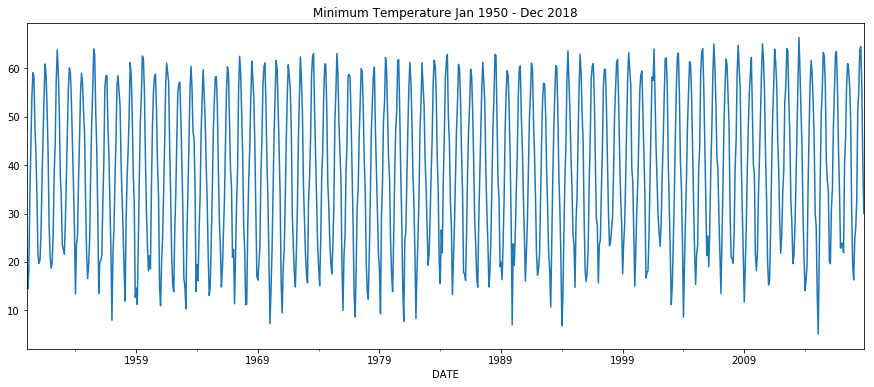

In [6]:
# plot the time series
temp_min.plot(figsize=(15, 6))
plt.title('Minimum Temperature Jan 1950 - Dec 2018')
plt.show()

In [7]:
# decompose the time series
decomposition = seasonal_decompose(temp_min, model='addictive', freq = 365)

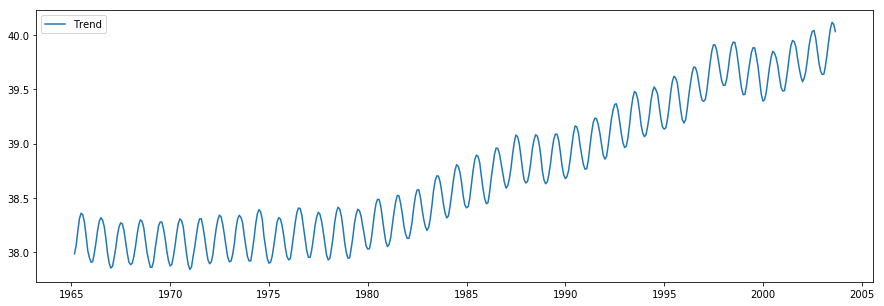

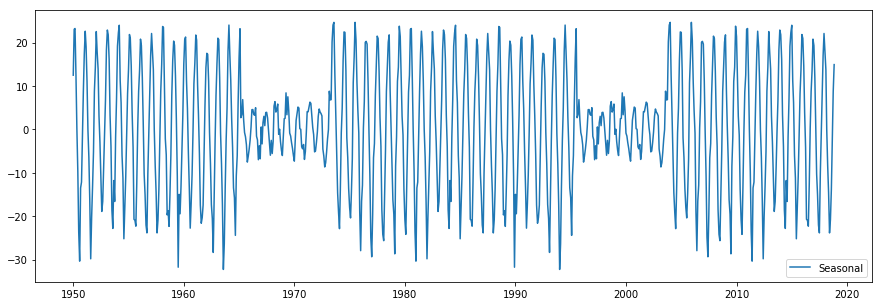

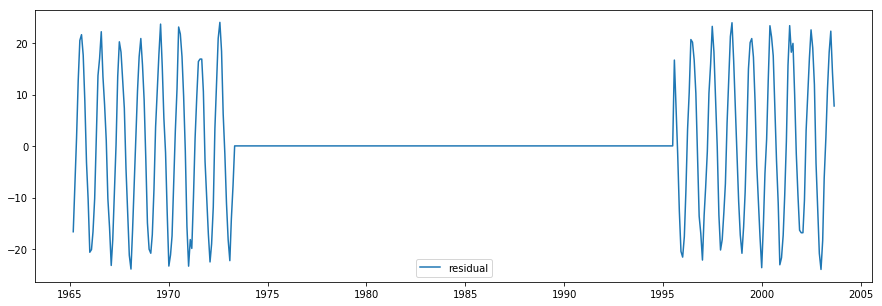

In [8]:
# plot the decomposition result
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize=(15,5))
plt.plot(trend,label='Trend')
plt.legend()

plt.figure(figsize=(15,5))
plt.plot(seasonal,label='Seasonal')
plt.legend()

plt.figure(figsize=(15,5))
plt.plot(residual,label='residual')
plt.legend()

plt.show()

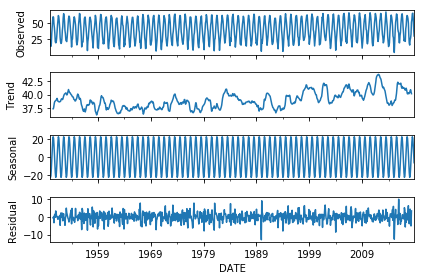

In [20]:

decomposition = sm.tsa.seasonal_decompose(temp_min, model='additive')
fig = decomposition.plot()
plt.show()

In [9]:
# get the AIC & BIC scores
stepwise_model = auto_arima(temp_min, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=4157.137, BIC=4180.646, Fit time=11.599 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=5087.030, BIC=5096.434, Fit time=0.205 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=4736.877, BIC=4755.685, Fit time=2.248 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=4169.744, BIC=4188.551, Fit time=10.338 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=4159.059, BIC=4187.271, Fit time=14.214 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=4647.088, BIC=4665.896, Fit time=3.720 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=4158.987, BIC=4187.198, Fit time=34.206 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=4160.613, BIC=4193.527, Fit time=40.160 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=4157.309, BIC=4185.521, Fit time=15.635 seconds
Fit ARIMA: order=(1, 1

In [10]:
# find the best model parameters
print(stepwise_model.aic())

4157.136643331452


In [11]:
# check the summary
print(stepwise_model.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0002      0.000      1.257      0.209   -9.03e-05       0.000
ar.L1          0.1433      0.030      4.826      0.000       0.085       0.202
ma.L1         -0.9800      0.009   -114.777      0.000      -0.997      -0.963
ma.S.L12      -0.9891      0.045    -22.072      0.000      -1.077      -0.901
sigma2         8.9962      0.463     19.447      0.000       8.090       9.903


In [12]:
# split train and test data
train = temp_min.loc['1950-01-01':'2010-12-01']
test = temp_min.loc['2011-01-01':]
test.head()

DATE
2011-01-01    15.225806
2011-02-01    16.214286
2011-03-01    26.451613
2011-04-01    38.966667
2011-05-01    49.677419
Freq: MS, Name: TMIN, dtype: float64

In [13]:
# fit the model
model = stepwise_model.fit(train)

In [14]:
test.count()

95

In [21]:
# future prediction
prediction = model.predict(n_periods=95)
print(prediction)
len(prediction)

[18.29030284 20.31887047 28.07827652 38.51146138 48.49289963 57.8457484
 63.47472668 62.15149406 54.49542232 44.01347446 35.01718083 23.88003044
 18.86230012 20.5321237  28.24723161 38.67520086 48.65628107 58.00937555
 63.63867457 62.31577203 54.66003152 44.17841504 35.18245281 24.04563381
 19.0282349  20.69838988 28.41382918 38.84212983 48.82354143 58.17696731
 63.80659773 62.48402659 54.82861748 44.34733239 35.35170156 24.21521397
 19.19814645 20.86863283 28.58440353 39.01303557 48.99477858 58.34853586
 63.97849767 62.65625793 55.00118022 44.52022653 35.5249271  24.3887709
 19.37203478 21.04285256 28.75895466 39.1879181  49.1699925  58.52408118
 64.1543744  62.83246605 55.17771974 44.69709745 35.70212942 24.56630462
 19.54989989 21.22104907 28.93748257 39.36677741 49.34918321 58.70360329
 64.3342279  63.01265096 55.35823604 44.87794515 35.88330851 24.74781511
 19.73174179 21.40322236 29.11998726 39.5496135  49.5323507  58.88710217
 64.51805819 63.19681264 55.54272912 45.06276963 36.0

95

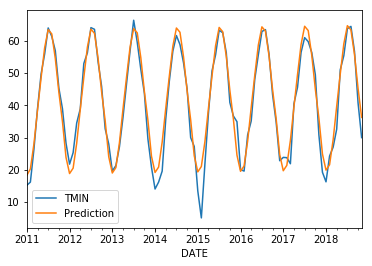

In [22]:
# check the accuracy of the prediction for 2016 - 2019
prediction_df = pd.DataFrame(prediction,index = test.index,columns=['Prediction'])
pd.concat([test,prediction_df],axis=1).plot()
plt.legend()
plt.show()

In [23]:
test_array = test.array
len(test_array)

95

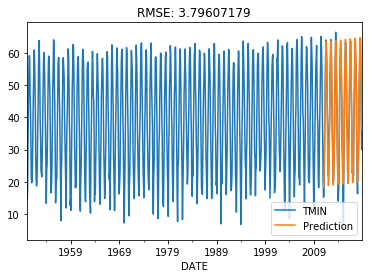

In [24]:
# plot the prediction with the whole graph
pd.concat([temp_min,prediction_df],axis=1).plot()
# get the RMSE = sum[(predicted value - real value)^2/ number of the values]
plt.title('RMSE: %2.8f'% np.sqrt(sum((prediction-test_array)**2)/len(test_array)))
plt.show()